In [1]:
import kagglehub
andrewmvd_liver_tumor_segmentation_path = kagglehub.dataset_download('andrewmvd/liver-tumor-segmentation')
andrewmvd_liver_tumor_segmentation_part_2_path = kagglehub.dataset_download('andrewmvd/liver-tumor-segmentation-part-2')

print('Data source import complete.')


Data source import complete.


In [2]:


import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-127.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-129.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-115.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-108.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-112.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-121.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-113.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-110.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-125.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-106.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-124.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-114.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-101.nii
/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8/volume-

In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import glob
import nibabel as nib
import cv2

from tqdm.notebook import tqdm

from PIL import Image

from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

import seaborn as sns
from tqdm.notebook import tqdm
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [4]:
file_list = []
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt1'):
    for filename in filenames:
        file_list.append((dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt2'):
    for filename in filenames:
        file_list.append((dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt3'):
    for filename in filenames:
        file_list.append((dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt4'):
    for filename in filenames:
        file_list.append((dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt5'):
    for filename in filenames:
        file_list.append((dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt6'):
    for filename in filenames:
        file_list.append((dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt7'):
    for filename in filenames:
        file_list.append((dirname, filename))
        
df_files = pd.DataFrame(file_list, columns=['dirname', 'filename'])
df_files.sort_values(by=['filename'], ascending=True)

,dirname,filename
6,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii
5,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii
4,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii
14,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-11.nii
11,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-12.nii
16,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-13.nii
13,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-14.nii
15,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-15.nii
20,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-16.nii
17,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-17.nii


In [5]:
df_files["mask_dirname"] = "" ; df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"
    
    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = '/kaggle/input/liver-tumor-segmentation/segmentations'

df_files_test= df_files[df_files.mask_filename=='']
# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 
print(len(df_files))
df_files

51


,dirname,filename,mask_dirname,mask_filename
0,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-11.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-11.nii
4,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-12.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-12.nii
5,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-13.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-13.nii
6,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-14.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-14.nii
7,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-15.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-15.nii
8,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-16.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-16.nii
9,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-17.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-17.nii


In [6]:
def read_nii(filepath):
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [7]:
sample = 0
sample_ct   = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])
sample_mask  = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])
print(sample_ct.shape) 
print(sample_mask.shape)

(512, 512, 75)
(512, 512, 75)


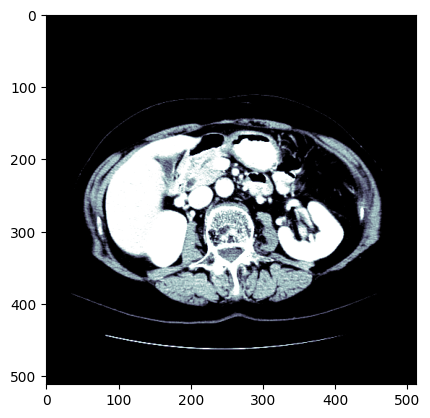

In [8]:
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

plt.imshow(tensor(sample_ct[...,50].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [9]:
def plot_sample(array_list, color_map = 'nipy_spectral'):

    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    
    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    
    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')


    plt.show()

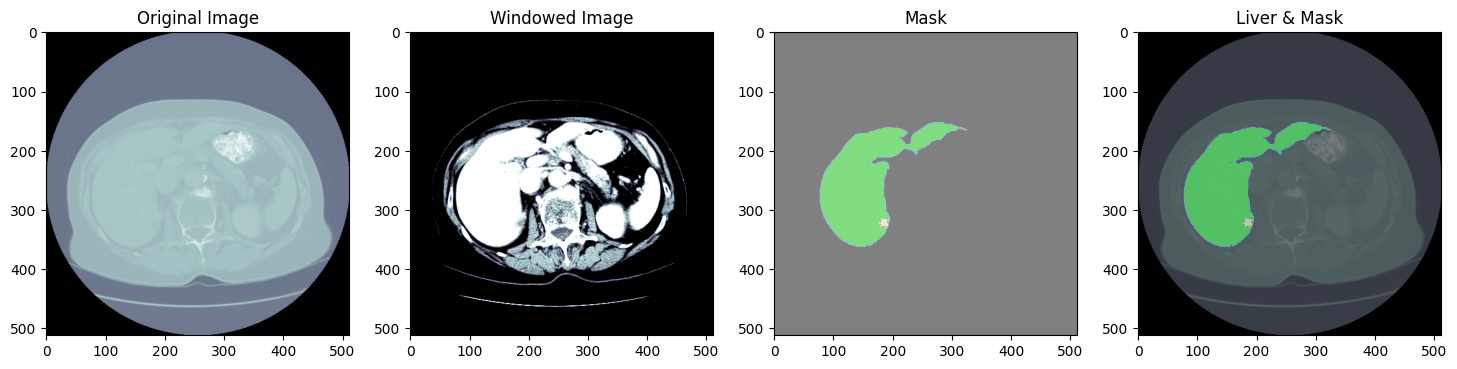

In [10]:
sample=56
sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[...,sample], sample_mask[...,sample]])

<Axes: >

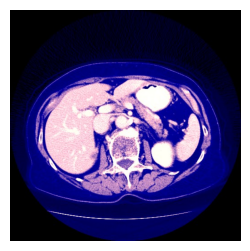

In [11]:
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    ''''"A function to split the range of pixel values into groups, 
    such that each group has around the same number of pixels"'''
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()
    
@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)
    
    
@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=90):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs=subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver,dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0])

In [12]:
import random

GENERATE_JPG_FILES = True   # warning: generation takes ~ 1h

if GENERATE_JPG_FILES:
    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    # Randomly select 1/3 of the indices
    random_indices = random.sample(range(len(df_files)), len(df_files) )

    for ii in tqdm(random_indices):  # take 1/3 nii files for training
        curr_ct = read_nii(df_files.loc[ii, 'dirname'] + "/" + df_files.loc[ii, 'filename'])
        curr_mask = read_nii(df_files.loc[ii, 'mask_dirname'] + "/" + df_files.loc[ii, 'mask_filename'])
        curr_file_name = str(df_files.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]  # 512, 512, curr_dim

        for curr_slice in range(0, curr_dim, 2):  # export every 2nd slice for training
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

  0%|          | 0/51 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


In [13]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from sklearn.model_selection import train_test_split


images_dir = 'train_images'
masks_dir = 'train_masks'


all_image_file_names = sorted(os.listdir(images_dir))


selected_image_file_names = random.sample(all_image_file_names, 3000)


target_size = (256, 256)
images = [np.array(Image.open(os.path.join(images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]


mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
masks = [np.array(Image.open(os.path.join(masks_dir, fname)).resize(target_size)) for fname in mask_file_names]


images = np.array(images)
masks = np.array(masks)


images = images / 255.0


masks = masks.reshape((masks.shape[0], masks.shape[1], masks.shape[2], 1))

In [14]:
images.shape

(3000, 256, 256, 3)

In [15]:
image_liver = []
mask_liver = []

for idx, img in enumerate(masks):
   
    unique_colors = np.unique(img)
    
    
    if len(unique_colors) == 1:
        image_liver.append(images[idx])
        mask_liver.append(masks[idx])
    
    if len(unique_colors) == 2:
        image_liver.append(images[idx])
        
        
        black_background = np.zeros_like(img)
        mask_liver.append(masks[idx])
    
    
    elif len(unique_colors) == 3:
       
        image_liver.append(images[idx])
        
       
        img_white_bg = np.where(img == 1, 2, img)
        mask_liver.append(img_white_bg)
        

        
image_liver = np.array(image_liver)
mask_liver = np.array(mask_liver)


print("image_liver shape:", image_liver.shape)
print("mask_liver shape:", mask_liver.shape)

image_liver shape: (3000, 256, 256, 3)
mask_liver shape: (3000, 256, 256, 1)


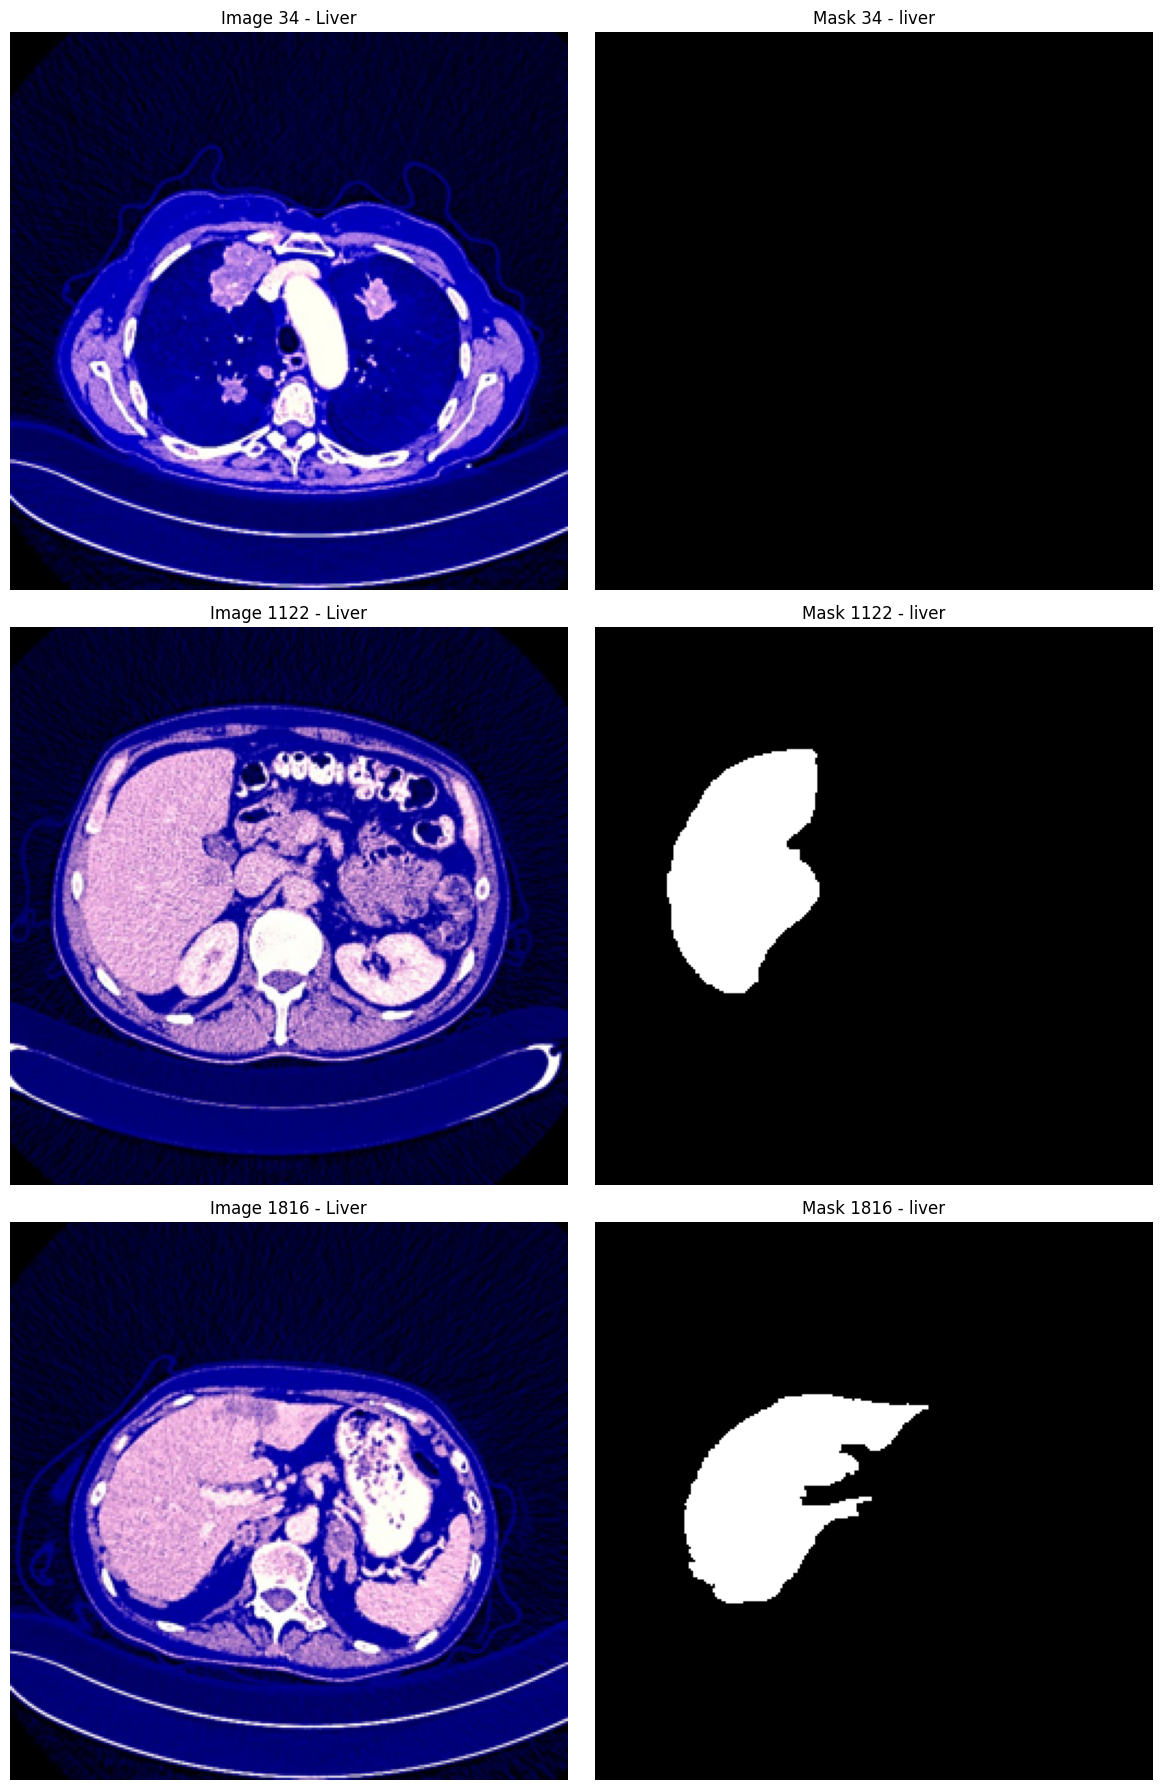

In [16]:
import matplotlib.pyplot as plt
import numpy as np


num_samples = min(3, len(image_liver))


indices = np.random.choice(len(image_liver), num_samples, replace=False)


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

for i, idx in enumerate(indices):
    axes[i, 0].imshow(image_liver[idx], cmap='gray')  # Assuming grayscale liver images
    axes[i, 0].set_title(f"Image {idx} - Liver")
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(mask_liver[idx], cmap='gray')  # Assuming grayscale tumor masks
    axes[i, 1].set_title(f"Mask {idx} - liver")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [17]:
x_train, x_temp, y_train, y_temp = train_test_split(image_liver, mask_liver, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.4, random_state=42)

In [18]:
y_train.shape, x_train.shape

((2400, 256, 256, 1), (2400, 256, 256, 3))

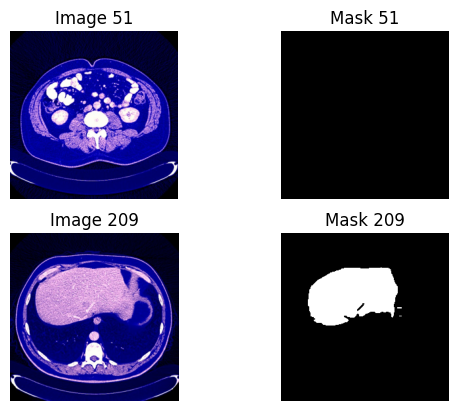

In [19]:
import matplotlib.pyplot as plt


def display_images_and_masks(images, masks, num_samples=2):
   
    sample_indices = random.sample(range(images.shape[0]), num_samples)

    for i in range(num_samples):
        index = sample_indices[i]

        
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(images[index])
        plt.title("Image {}".format(index))
        plt.axis("off")

        
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(masks[index].squeeze(), cmap='gray')
        plt.title("Mask {}".format(index))
        plt.axis("off")

    plt.show()


display_images_and_masks(x_train, y_train)

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Concatenate, UpSampling2D, Dropout, Reshape
from tensorflow.keras.models import Model

def dense_block(x, filters, dropout_rate=0.2):
    x1 = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x1 = Conv2D(filters, (3, 3), padding='same', activation='relu')(x1)
    x = Concatenate()([x, x1])
    
    return x

def transition_down_block(x, filters, dropout_rate=0.2):
    x = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    return x

def transition_up_block(x, filters, skip_connection, dropout_rate=0.2):
    x = UpSampling2D((2, 2))(x)
    x = Concatenate()([x, skip_connection])
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    
    return x

def build_densenet(input_shape=(256, 256, 3), dropout_rate=0.1):
    inputs = Input(shape=input_shape)
    
    # Initial convolution
    x = Conv2D(128, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    
    # Max pooling
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Dense block 1
    x = dense_block(x, 64)
    x1 = x
    x = transition_down_block(x, 128)
    
    # Dense block 2
    x = dense_block(x, 128)
    x2 = x
    x = transition_down_block(x, 256)

    # Upsampling
    x = transition_up_block(x, 256, x2)
    x = transition_up_block(x, 128, x1)
    #x = UpSampling2D((2, 2))(x)
    #x = UpSampling2D((2, 2))(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)


    
    # Final convolution
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

model = build_densenet(input_shape=(256, 256, 3), dropout_rate=0.2)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │     18,944 │ input_layer[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     73,792 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     36,928 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ max_pooling2d[0]… │
│ (Concatenate)       │ 192)              │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │     24,704 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     73,792 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     73,856 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32, 32,    │          0 │ max_pooling2d_1[… │
│ (Concatenate)       │ 256)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     65,792 │ concatenate_1[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 32, 32,    │          0 │ max_pooling2d_2[… │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 32, 32,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 512)              │            │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  1,179,904 │ concatenate_2[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 64, 64,    │          0 │ conv2d_7[0][0]  

 Total params: 2,156,609 (8.23 MB)

 Trainable params: 2,156,417 (8.23 MB)

 Non-trainable params: 192 (768.00 B)

In [21]:
import tensorflow.keras.backend as K

def combined_loss(y_true, y_pred):
    
    y_true = K.cast(y_true, dtype='float32')
    
   
    bce = K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)
    
    
    smooth = 1.0
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2.0 * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    
    
    combined_loss = bce - K.log(dice)
    
    return combined_loss

def dice_coefficient(y_true, y_pred):
    smooth = 1.0
    
    
    y_true = K.cast(y_true, dtype='float32')
    
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f)
    
    dice = (2.0 * intersection + smooth) / (union + smooth)
    return dice

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

checkpoint = ModelCheckpoint("model10.keras", monitor='val_loss', verbose=1, save_best_only=True,
                             save_weights_only=False, mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss=combined_loss, metrics=['accuracy', dice_coefficient])





In [23]:
try:
    print("Training started...")
    history = model.fit(x_train, y_train, epochs=20, batch_size=32,
                        validation_data=(x_valid, y_valid), 
                        callbacks=[reduce_lr, checkpoint])
    print("Training completed successfully.")

    
    model.save('model_final7.keras')
    print("Model saved successfully.")

except Exception as e:
    print(f"Error encountered during training: {e}")

Training started...
Epoch 1/20


I0000 00:00:1732463306.989831      77 service.cc:145] XLA service 0x7da4bc001b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732463306.989882      77 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/75 ━━━━━━━━━━━━━━━━━━━━ 27:57 23s/step - accuracy: 0.6013 - dice_coefficient: 0.0611 - loss: 3.6175

I0000 00:00:1732463325.388543      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8181 - dice_coefficient: 0.1321 - loss: 2.7340
Epoch 1: val_loss improved from inf to 2.24667, saving model to model10.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 209ms/step - accuracy: 0.8190 - dice_coefficient: 0.1324 - loss: 2.7304 - val_accuracy: 0.9578 - val_dice_coefficient: 0.1646 - val_loss: 2.2467 - learning_rate: 5.0000e-04
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9487 - dice_coefficient: 0.2239 - loss: 1.9569
Epoch 2: val_loss improved from 2.24667 to 0.45794, saving model to model10.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.9488 - dice_coefficient: 0.2243 - loss: 1.9549 - val_accuracy: 0.9808 - val_dice_coefficient: 0.6619 - val_loss: 0.4579 - learning_rate: 5.0000e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9688 - dice_coefficient: 0.3754 - loss: 1.2748
Epoch 3: val_loss improved from 0.45794 to 0.29533, saving model to model10.keras
75/75 ━━━━━━━━━━━━━━━━

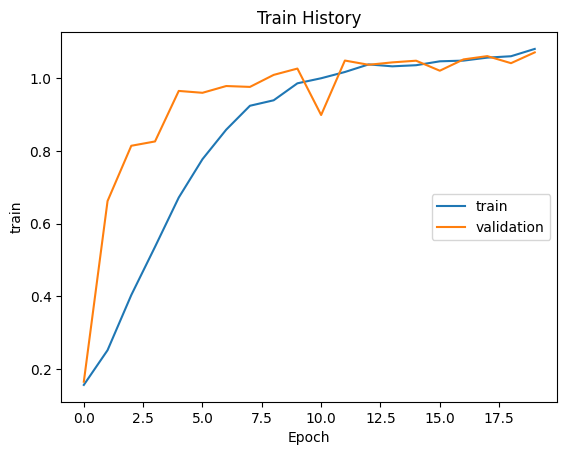

In [24]:
import matplotlib.pyplot as plt
def show_history(history, train, validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
show_history(history, 'dice_coefficient', 'val_dice_coefficient')

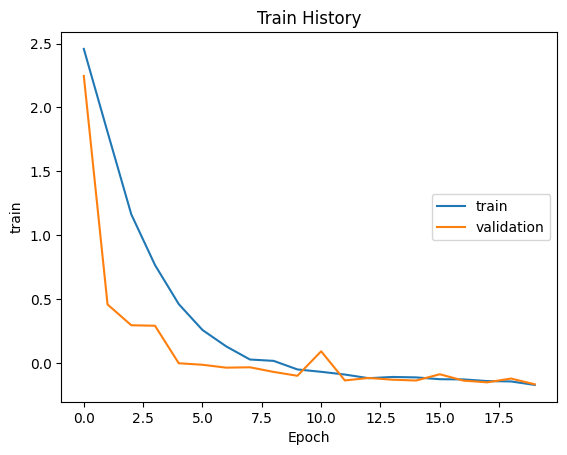

In [25]:
show_history(history, 'loss', 'val_loss')

In [26]:
scores = model.evaluate(x_valid, y_valid)
scores[1]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9890 - dice_coefficient: 1.0899 - loss: -0.1905


0.989842414855957

In [27]:
prediction = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step


In [28]:
test_scores = model.evaluate(x_test, y_test)
test_scores[1]

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9860 - dice_coefficient: 1.1018 - loss: -0.2340


0.9862240552902222

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


<Figure size 1200x400 with 0 Axes>

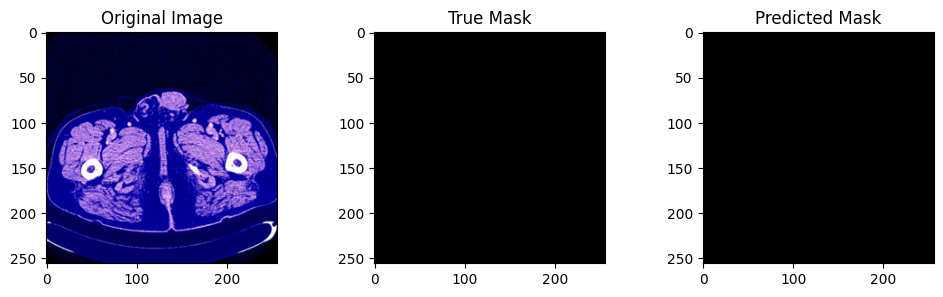

In [29]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 100


input_image = x_test[image_index]
true_mask = y_test[image_index]


predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]


threshold = 0.1  
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)


plt.figure(figsize=(12, 4))



plt.figure(figsize=(12, 3))


plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')


plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')


plt.subplot(1,3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')


plt.show()